In [1]:
import pandas as pd
import random
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import json 
from skimage import color
from skimage.feature import hog
from sklearn.metrics import classification_report,accuracy_score

In [2]:
#with open(r'C:\Users\Ayush\Desktop\ships-in-satellite-imagery\shipsnet.json') as data_file:
   # data = json.load(data_file)
#Shipsnet= pd.DataFrame(data)
#print(Shipsnet.head())
#print(Shipsnet.shape)
f = open(r'C:\Users\Ayush\Desktop\ships-in-satellite-imagery\shipsnet.json')
dataset = json.load(f)
f.close()

dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [25]:
#print ("target::",dataset['labels'])

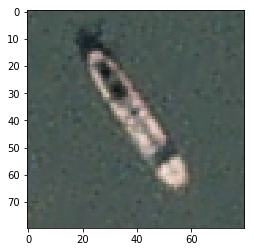

In [4]:
data = np.array(dataset['data']).astype('uint8')
img_length = 80
data = data.reshape(-1,3,img_length,img_length).transpose([0,2,3,1])

plt.imshow(data[55])

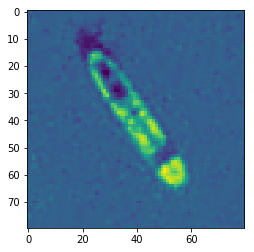

In [15]:
data_gray = [ color.rgb2gray(i) for i in data]
plt.imshow(data_gray[55])

In [29]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

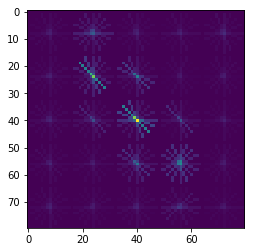

In [28]:
plt.imshow(hog_images[55])

In [17]:
labels =  np.array(dataset['labels']).reshape(len(dataset['labels']),1)

In [18]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

In [19]:
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [20]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_pred = clf.predict(x_test)

In [13]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.915


             precision    recall  f1-score   support

        0.0       0.91      0.99      0.95       611
        1.0       0.96      0.67      0.79       189

avg / total       0.92      0.92      0.91       800

